In [1]:
import json
import glob
from PIL import Image
import requests
import numpy as np
from matplotlib import pyplot as plt 
from mpl_toolkits.axes_grid1 import make_axes_locatable
from skimage.transform import resize




In [2]:
def extract_img_heatmap(json_pth, normalize = False, visualize=True):
    with open(json_pth) as f:
        loaded_json = json.loads(f.readline())
        
    x = loaded_json['loss']
    target = loaded_json['target']
    
    if normalize:
        facts = loaded_json['factors']
        for i, f in enumerate(facts):
            x[i+1] /= 1+sum([1-fi for fi in f])
    
    y = ((np.array(x[1:]))-np.array(x[0])) #**2
    #y[y>0] = 0.
    #y = ((np.array(x[1:])**2)-np.array(x[0])**2)**2
    y= y.reshape(12,12)
    y = resize(y,(30,30))
    
    if visualize:
        fig,(ax1,ax2,ax3,ax4,ax5) = plt.subplots(1,5)
        
        ax1.set_title(json_pth.split('/')[-3] + " // " + target)
        raw_image = Image.open(loaded_json['img'].replace('/root/bjoern/atman_other_model/','/nfs/scratch_2/bjoern/atman_other_model/'))
        raw_image.resize((300,300))
        ax1.imshow(raw_image)
        ax1.axis('off')
        
        z1 = y.copy()
        z1[y>0] = 0.
        im2 = ax2.imshow(-z1)
        
        z2 = y.copy()
        z2[y<0] = 0.
        im3 = ax3.imshow(z2)
        
        z = y.copy()**2
        im4 = ax4.imshow(z)
        
        scale = np.absolute(z).max()
        z = (z1/scale)+(z2/scale)
        im5 = ax5.imshow(z)


        #ax2.imshow(y>.01)
        ax2.axis('off')
        #ax2.colorbar()
        
    return y

In [15]:
def extract_img_heatmap_large(json_pth, normalize = False, visualize=True):
    with open(json_pth) as f:
        loaded_json = json.loads(f.readline())
        
    x = loaded_json['loss']
    target = loaded_json['target']
    
    if normalize:
        facts = loaded_json['factors']
        for i, f in enumerate(facts):
            x[i+1] /= 1+sum([1-fi for fi in f])
    
    y = ((np.array(x[1:]))-np.array(x[0])) #**2
    #y[y>0] = 0.
    #y = ((np.array(x[1:])**2)-np.array(x[0])**2)**2
    #y= y.reshape(12,12)
    y = resize(y,(30,30))
    
    if visualize:
        fig,(ax1,ax2,ax3,ax4,ax5) = plt.subplots(1,5)
        
        ax1.set_title(json_pth.split('/')[-3] + " // " + target)
        raw_image = Image.open(loaded_json['img'].replace('/root/bjoern/atman_other_model/','/nfs/scratch_2/bjoern/atman_other_model/'))
        raw_image.resize((300,300))
        ax1.imshow(raw_image)
        ax1.axis('off')
        
        z1 = y.copy()
        z1[y>0] = 0.
        im2 = ax2.imshow(-z1)
        
        z2 = y.copy()
        z2[y<0] = 0.
        im3 = ax3.imshow(z2)
        
        z = y.copy()**2
        im4 = ax4.imshow(z)
        
        scale = np.absolute(z).max()
        z = (z1/scale)+(z2/scale)
        im5 = ax5.imshow(z)


        #ax2.imshow(y>.01)
        ax2.axis('off')
        #ax2.colorbar()
        
    return y

/nfs/scratch_2/bjoern/atman_other_model/openimages-mini/Bottle/images/1.jpg_explanation_run2_Bottle.json
/nfs/scratch_2/bjoern/atman_other_model/openimages-mini/Hippopotamus/images/1.jpg_explanation_run2_Hippopotamus.json
/nfs/scratch_2/bjoern/atman_other_model/openimages-mini/Raven/images/1.jpg_explanation_run2_Raven.json
/nfs/scratch_2/bjoern/atman_other_model/openimages-mini/High heels/images/1.jpg_explanation_run2_High heels.json
/nfs/scratch_2/bjoern/atman_other_model/openimages-mini/Lipstick/images/1.jpg_explanation_run2_Lipstick.json


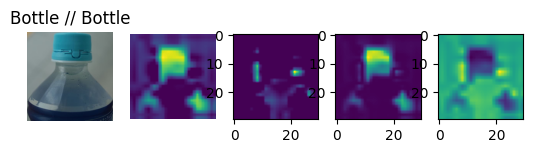

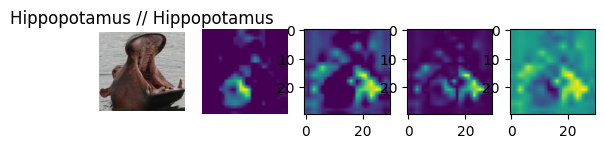

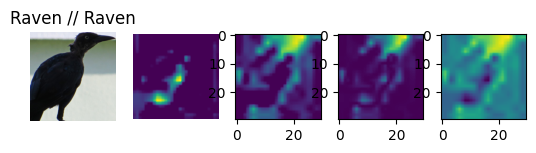

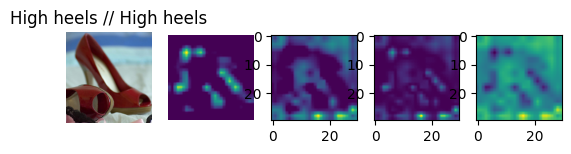

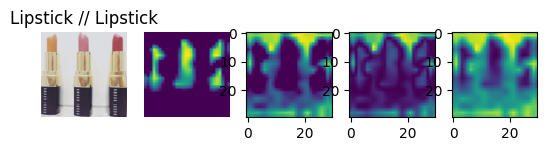

In [23]:
#suffix = '7_fix2' #failure
#suffix = '7_fix3' #better at least?
#suffix='8_AH' 
#suffix='7_fix3'
#suffix='22_cap_suppressions'
#suffix='51_cap_suppressions_magmastyle_dog'
suffix='run2'

#for p in glob.glob(f'/nfs/scratch_2/bjoern/atman_other_model/openimages-mini/*/images/*_explanation_*Lipstick*')[:]:
for p in glob.glob(f'/nfs/scratch_2/bjoern/atman_other_model/openimages-mini/*/images/*_explanation_{suffix}*')[:5]: #[40:60]: #[40:50]:
#for p in glob.glob(f'/nfs/scratch_2/bjoern/atman_other_model/others/BLIP/test_folder/*_explanation_{suffix}*')[:10]:
    print(p)
    extract_img_heatmap(p)#, True)

/nfs/scratch_2/bjoern/atman_other_model/openimages-mini/Bottle/images/1.jpg_explanation_run2_Bottle.json
/nfs/scratch_2/bjoern/atman_other_model/openimages-mini/Hippopotamus/images/1.jpg_explanation_run2_Hippopotamus.json
/nfs/scratch_2/bjoern/atman_other_model/openimages-mini/Raven/images/1.jpg_explanation_run2_Raven.json
/nfs/scratch_2/bjoern/atman_other_model/openimages-mini/High heels/images/1.jpg_explanation_run2_High heels.json
/nfs/scratch_2/bjoern/atman_other_model/openimages-mini/Lipstick/images/1.jpg_explanation_run2_Lipstick.json


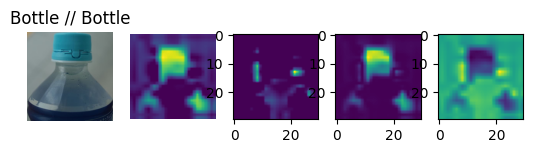

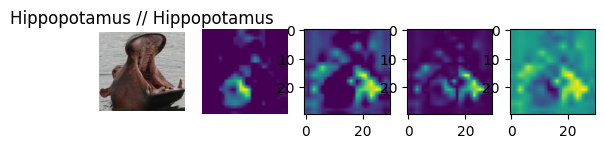

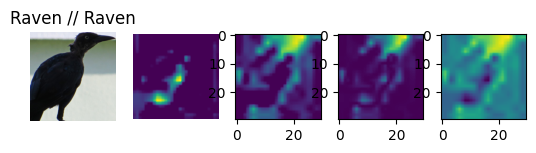

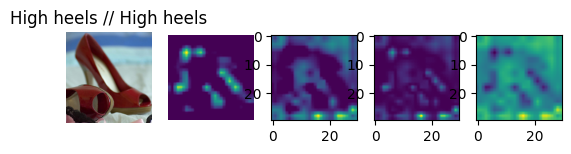

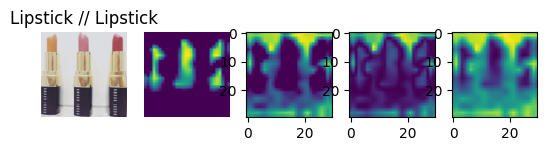

In [3]:
#suffix = '7_fix2' #failure
#suffix = '7_fix3' #better at least?
#suffix='8_AH' 
#suffix='7_fix3'
#suffix='19_cap_suppressions'
#suffix='51_cap_suppressions_magmastyle_dog'
suffix='run2'

#for p in glob.glob(f'/nfs/scratch_2/bjoern/atman_other_model/openimages-mini/*/images/*_explanation_*Lipstick*')[:]:
for p in glob.glob(f'/nfs/scratch_2/bjoern/atman_other_model/openimages-mini/*/images/*_explanation_{suffix}*')[:5]: #[40:60]: #[40:50]:
#for p in glob.glob(f'/nfs/scratch_2/bjoern/atman_other_model/others/BLIP/test_folder/*_explanation_{suffix}*'):
    print(p)
    extract_img_heatmap(p)#, True)

In [4]:
def AP(x,y):
    x_abs = np.absolute(x)
    return (x_abs.reshape(-1)*y.reshape(-1)).sum()/x_abs.sum()

def AR(x,y):
    x_abs = np.absolute(x)
    x_norm = x_abs/x_abs.max()
    return (x_norm.reshape(-1)*y.reshape(-1)).sum()/y.sum()

In [5]:
visualize=False
all_aps = []
all_ars = []
for p in glob.glob(f'/nfs/scratch_2/bjoern/atman_other_model/openimages-mini/*/images/*_explanation_{suffix}*'): #[:5]: #[40:60]: #[40:50]:
    y = extract_img_heatmap(p, visualize=visualize)#, True)
    jpg = p.split('/')[-1].split('_explanation_')[0]
    mask = '/'.join(p.split('/')[:-2]+['masks',jpg])
    mask_array = np.asarray(Image.open(mask).resize((30,30))) > 50 #.numpy()

    all_aps.append(AP(y,mask_array))
    all_ars.append(AR(y,mask_array))

In [6]:
sum(all_aps)/len(all_aps), sum(all_ars)/len(all_ars)

(0.6461537253647318, 0.2836140426011922)

In [7]:
iqr = np.percentile(np.array(all_aps),[72,25])

In [8]:
all_aps = np.array(all_aps)
all_ars = np.array(all_ars)

In [9]:
all_aps_iqr = all_aps[all_aps <= iqr[0]]
all_aps_iqr = all_aps_iqr[all_aps_iqr >= iqr[1]]

In [10]:
all_aps_iqr.mean()

0.6607665384222876

In [11]:
iqr = np.percentile(np.array(all_ars),[72,25])

In [12]:
all_ars_iqr = all_ars[all_ars <= iqr[0]]
all_ars_iqr = all_ars_iqr[all_ars_iqr >= iqr[1]]
all_ars_iqr.mean()

0.2644941774841937